In [17]:
import cv2
img = cv2.imread('rabbit.png')

In [18]:
type(img)

numpy.ndarray

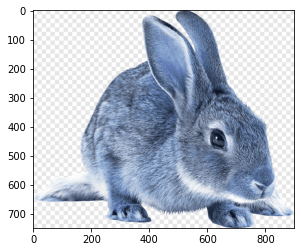

In [19]:
import matplotlib.pyplot as plt
plt.imshow(img)

In [20]:
img.shape

(749, 900, 3)

In [21]:
img.ndim

3

In [22]:
img[:, :, 0]

array([[255, 255, 255, ..., 230, 230, 230],
       [255, 255, 255, ..., 230, 230, 230],
       [255, 255, 255, ..., 230, 230, 230],
       ...,
       [230, 230, 230, ..., 255, 255, 255],
       [230, 230, 230, ..., 255, 255, 255],
       [230, 230, 230, ..., 255, 255, 255]], dtype=uint8)

In [23]:
 img[:, :, 0].shape

(749, 900)

In [28]:
img_array = img / 255

In [25]:
img_array.max(), img_array.min()

(1.0, 0.054901960784313725)

In [26]:
img_array.dtype

dtype('float64')

In [29]:
red_array = img_array[:, :, 0]
green_array = img_array[:, :, 1]
blue_array = img_array[:, :, 2]

In [30]:
from numpy import linalg

In [31]:
img_gray = img_array @ [0.2126, 0.7152, 0.0722]

In [32]:
img_gray.shape

(749, 900)

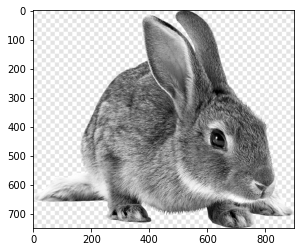

In [33]:
plt.imshow(img_gray, cmap="gray")

In [34]:
U, s, Vt = linalg.svd(img_gray)

In [35]:
U.shape, s.shape, Vt.shape

((749, 749), (749,), (900, 900))

In [40]:
import numpy as np
Sigma = np.zeros((749, 900))
for i in range(749):
     Sigma[i, i] = s[i]

In [41]:
linalg.norm(img_gray - U @ Sigma @ Vt)

3.3236666766359744e-12

In [42]:
np.allclose(img_gray, U @ Sigma @ Vt)

True

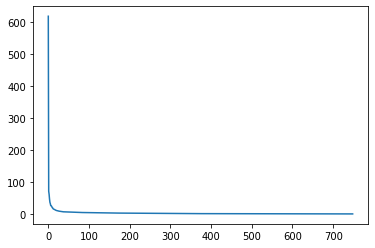

In [43]:
plt.plot(s)

In [44]:
k = 10

In [45]:
approx = U @ Sigma[:, :k] @ Vt[:k, :]

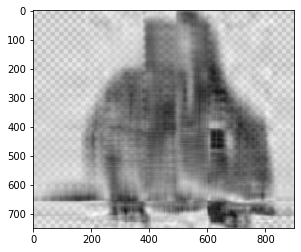

In [46]:
plt.imshow(approx, cmap="gray")

In [51]:
img_array.shape

(749, 900, 3)

In [54]:
import numpy as np

In [56]:
img_array_transposed = np.transpose(img_array, (2, 0, 1))
img_array_transposed.shape

(3, 749, 900)

In [57]:
U, s, Vt = linalg.svd(img_array_transposed)

In [58]:
U.shape, s.shape, Vt.shape

((3, 749, 749), (3, 749), (3, 900, 900))

In [60]:
Sigma = np.zeros((3, 749, 900))
for j in range(3):
     np.fill_diagonal(Sigma[j, :, :], s[j, :])

In [61]:
reconstructed = U @ Sigma @ Vt

In [62]:
reconstructed.shape

(3, 749, 900)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


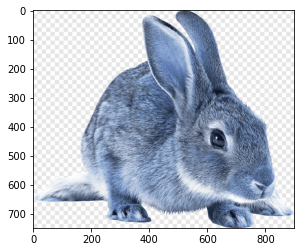

In [63]:
plt.imshow(np.transpose(reconstructed, (1, 2, 0)))

In [64]:
approx_img = U @ Sigma[..., :k] @ Vt[..., :k, :]

In [65]:
approx_img.shape

(3, 749, 900)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


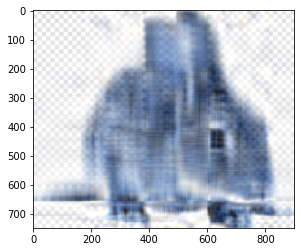

In [66]:
plt.imshow(np.transpose(approx_img, (1, 2, 0)))